In [1]:
import wandb
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: nhattran134. Use `wandb login --relogin` to force relogin


In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Simple transformation

- Limit price range between min_price and max_price
- Convert last_review to datetime

In [5]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46428 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              46428 non-null  int64         
 1   name                            46413 non-null  object        
 2   host_id                         46428 non-null  int64         
 3   host_name                       46407 non-null  object        
 4   neighbourhood_group             46428 non-null  object        
 5   neighbourhood                   46428 non-null  object        
 6   latitude                        46428 non-null  float64       
 7   longitude                       46428 non-null  float64       
 8   room_type                       46428 non-null  object        
 9   price                           46428 non-null  int64         
 10  minimum_nights                  46428 non-null  int64         
 11  nu

### Check null percentage

In [7]:
df.isna().sum()/len(df)

id                                0.000000
name                              0.000323
host_id                           0.000000
host_name                         0.000452
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.197769
reviews_per_month                 0.197769
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [8]:
%matplotlib inline

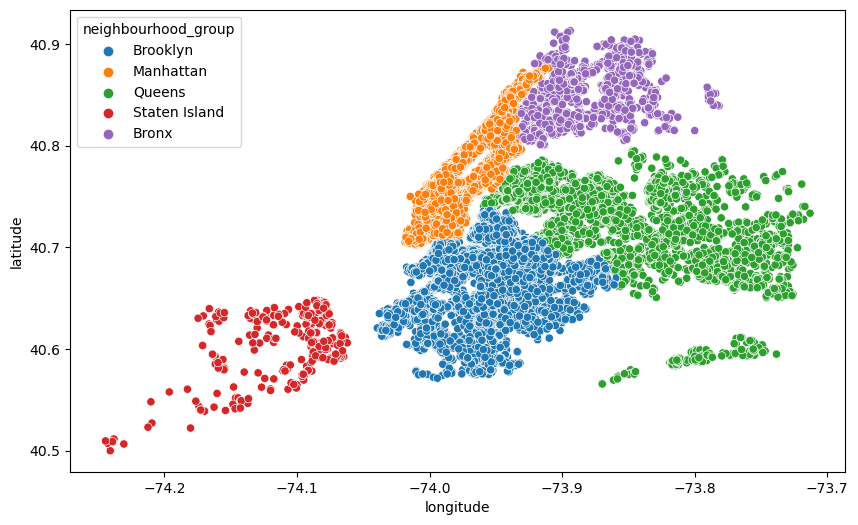

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group);

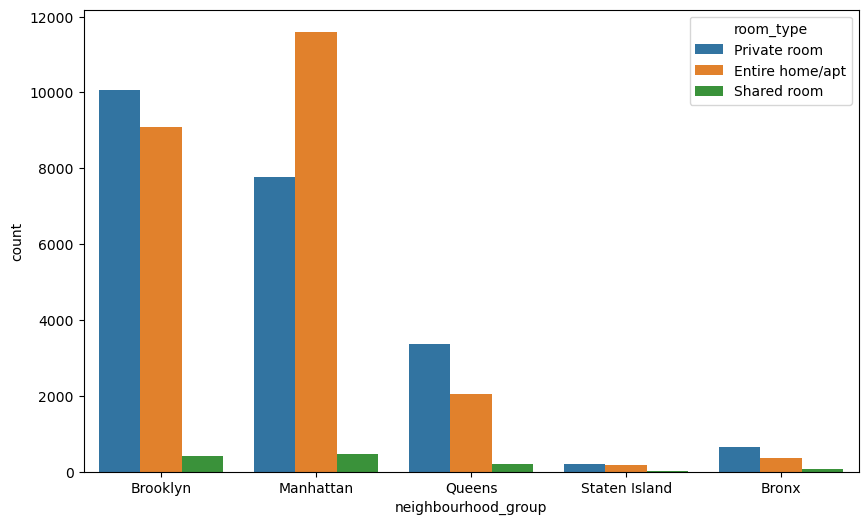

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='neighbourhood_group',hue='room_type')
plt.show()

## Check if there are any location outside of New York

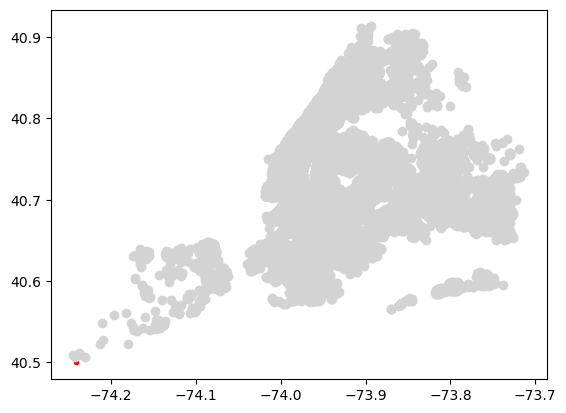

In [11]:
idx = df['longitude'].between(-74.25, -73.50) & df['latitude'].between(
        40.5, 41.2)
ny_df = df[idx].copy()
plt.scatter(df.longitude, df.latitude, marker='.', color='red')
plt.scatter(ny_df['longitude'],ny_df['latitude'], marker='o', color='lightgrey')

In [12]:
run.finish()